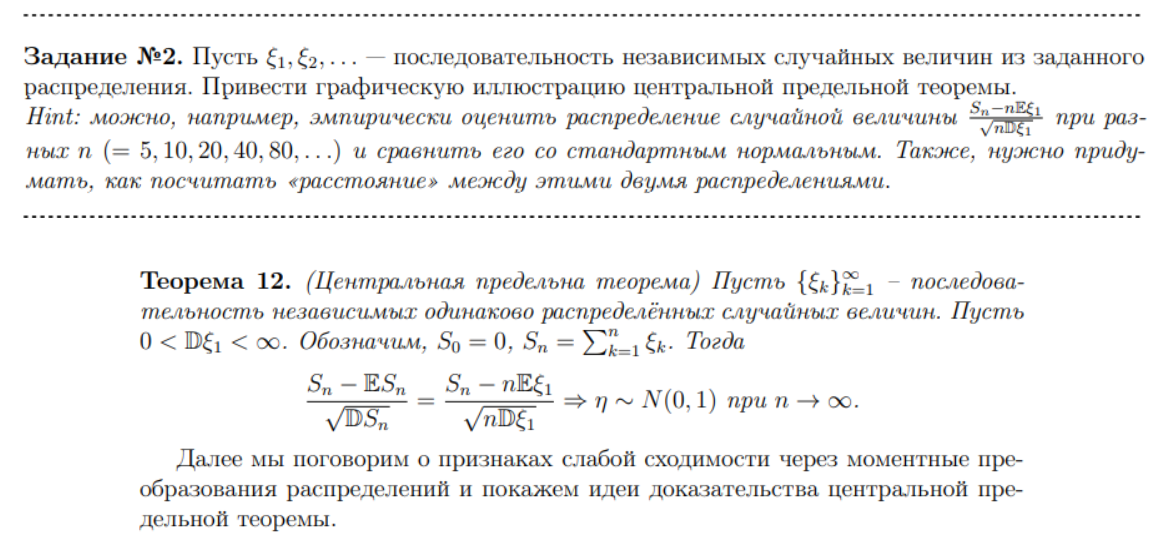

In [15]:
import numpy as np
from scipy.stats import randint, norm, kstest
import matplotlib.pyplot as plt
import seaborn
from statsmodels.distributions.empirical_distribution import ECDF

In [6]:
a = 3
b = 10

In [7]:
p = randint(a, b-a+1)

In [8]:
nsim = 1000
n_values = [5, 10, 20, 40, 80, 160, 320, 640, 1280, 10000, 50000, 100000]

In [9]:
sample_sums = np.zeros((len(n_values), nsim))
for i, n in enumerate(n_values):
    for j in range(nsim):
        sample = p.rvs(size=n)
        sample_sums[i, j] = np.sum(sample)
variance = p.var()
std_norm = norm()

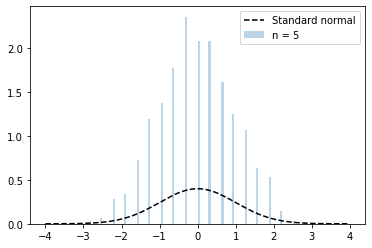

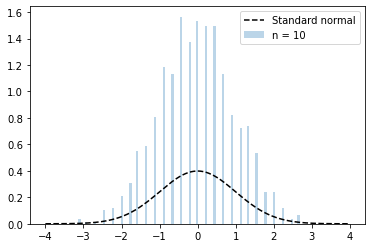

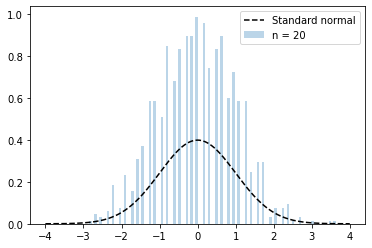

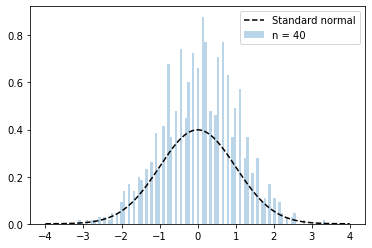

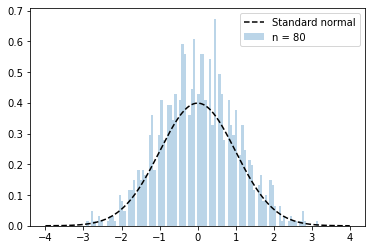

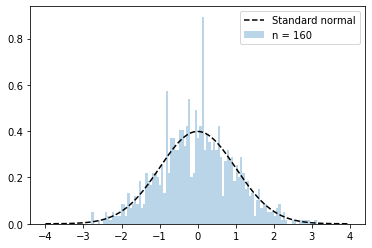

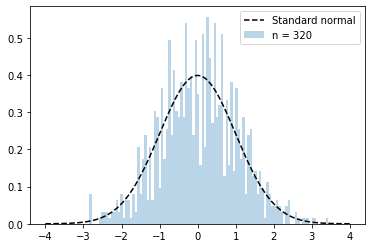

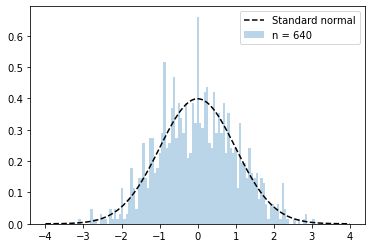

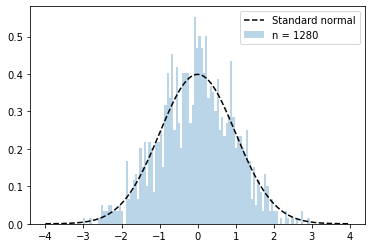

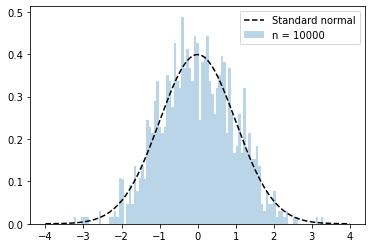

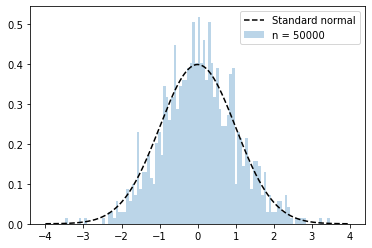

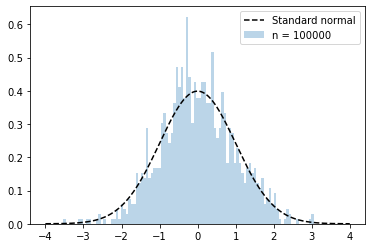

In [10]:
x = np.linspace(-4, 4, 1280)
for i, n in enumerate(n_values):
    plt.hist((sample_sums[i, :] - n*p.mean()) / np.sqrt(variance*n), density = True, alpha = 0.3, label = 'n = {}'.format(n), bins = 100)
    plt.plot(x, norm.pdf(x), 'k--', label='Standard normal')
    plt.legend()
    plt.show()

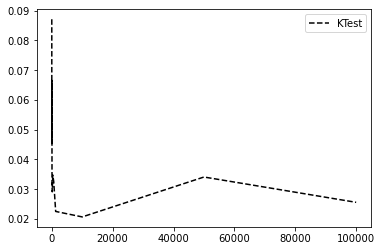

In [11]:
D = np.arange(np.size(n_values), dtype=np.float64)
P = np.arange(np.size(n_values), dtype=np.float64)
for i, n in enumerate(n_values):
    D[i], P[i] = kstest((sample_sums[i, :] - n*p.mean()) / np.sqrt(p.var()*n), std_norm.cdf)
plt.plot(n_values, D, 'k--', label='KTest')
plt.legend()
plt.show()

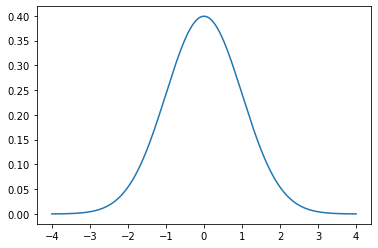

In [12]:
x = np.arange (-4, 4, 0.001)
plt.plot (x, norm.pdf (x, 0, 1))

(array([   1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,    1.,
           1.,    1.,    1.,    1.,    1.,    2.,    2.,    2.,    2.,
           2.,    2.,    3.,    3.,    3.,    3.,    3.,    3.,    3.,
           3.,    3.,    3.,    3.,    3.,    3.,    3.,    3.,    3.,
           3.,    3.,    3.,    3.,    3.,    3.,    3.,    3.,    4.,
           4.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,    4.,
           4.,    5.,    5.,    5.,    5.,    5.,    5.,    5.,    5.,
           5.,    5.,    5.,    5.,    5.,    5.,    5.,    5.,    5.,
      

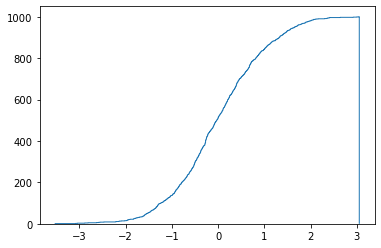

In [14]:
plt.hist((sample_sums[i, :] - n*p.mean()) / np.sqrt(variance*n), histtype='step', cumulative=True, bins=len(sample_sums[i, :]))

1000


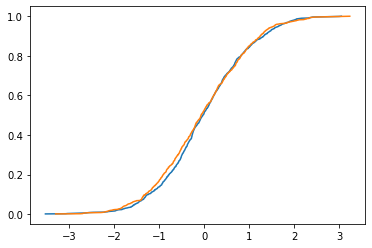

In [20]:
CPT = (sample_sums[i, :] - n*p.mean()) / np.sqrt(variance*n)
print(np.size(CPT))
NORM = std_norm.rvs(np.size(CPT))
ecdf = ECDF(CPT)
x = ecdf.x
y = ecdf.y
plt.plot(x, y)
ecdf = ECDF(NORM)
x = ecdf.x
y = ecdf.y
plt.plot(x, y)
plt.show()